# Modeliranje 1-D porazdelitve: razpadi Higgsovega bozona

Repozitorij naloge: https://github.com/j-gavran/PSUF_Hmumu

## 1. naloga: Praktikum strojnega učenja v fiziki 2024/25

**predavatelj**: [prof. dr. Borut Paul Kerševan](mailto:borut.kersevan@ijs.si)  
**asistent**: [Jan Gavranovič](mailto:jan.gavranovic@ijs.si)

# Metode jeder

- Imamo $N$ vrednosti neke funkcije $y_n = f(\vec{x}_n)$ za $n=1:N$, kjer je $f$ neznana funkcija.
- Naša podatkovna (učna) množica je
$$
\mathcal{D}=\{(\vec{x}_n, y_n)\} \>.
$$
- Če želimo napovedati vrednosti $f$ v novi točki $\vec{x}_*$, moramo primerjati $\vec{x}_*$ z vsemi $N$ vrednostmi $\{\vec{x}_n\}$.
- Zanima nas kako podobne so si vrednosti $\vec{x}_*$ in $\vec{x}_n$.
- To podobnost izračuna jedrna funkcija $k(\vec{x}_n, \vec{x}_*) \geq 0$.
- Za $N$ podatkovni točk definiramo $N \times N$ podobnostno matriko (*kernel matrix*):
$$
K = 
\begin{bmatrix}
    k(\vec{x}_1, \vec{x}_1) & k(\vec{x}_1, \vec{x}_2) & \cdots & k(\vec{x}_1, \vec{x}_N) \\
    k(\vec{x}_2, \vec{x}_1) & k(\vec{x}_2, \vec{x}_2) & \cdots & k(\vec{x}_2, \vec{x}_N) \\
    \vdots          & \vdots          & \ddots & \vdots          \\
    k(\vec{x}_N, \vec{x}_1) & k(\vec{x}_N, \vec{x}_2) & \cdots & k(\vec{x}_N, \vec{x}_N)
\end{bmatrix} \>.
$$

#### Primer kvadratičnega jedra

- Zamislimo si jedro oblike $k(\vec{x}, \vec{x}^\prime)=(\vec{x}^\top \vec{x}^\prime)^2$.
- V dveh dimenzijah imamo:
$$
k(\vec{x}, \vec{x}^\prime) = (x_1x_2^\prime + x_2x_2^\prime)^2 = x_1^2x_1^{\prime 2} + 2 x_1x_2x_1^\prime x_2^\prime + x_2^2x_2^{\prime 2} \>.
$$
- To lahko zapišemo kot $k(\vec{x}, \vec{x}^\prime)=\vec{\phi}(\vec{x})^\top \vec{\phi}(\vec{x})$, če definiramo
$$
\vec{\phi}(x_1,x_2) = [x_1^2, \sqrt{2}x_1x_2, x_2^2] \in \mathbb{R}^3 \>.
$$
- S tem smo zapisali (*embed*) 2d vhodne podatke v 3d (*feature*) prostor $\vec{\phi}(\vec{x})$.

#### Primer jedra RBF

- V primeru jedra RBF imamo vektorje $\vec{\phi}$ v [neskončno](https://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/svms/RBFKernel.pdf) dimenzionalnem prostoru $\vec{\phi}_{\text{RBF}}(\vec{x}):\mathbb{R}^n\rightarrow \mathbb{R}^\infty$.
- [RBF](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) lahko zapišemo z [razvojem](https://andrewcharlesjones.github.io/journal/rbf.html):

$$
k_{ij} = \sigma^2 \phi(x_i)^\top \phi(x_j) = \sigma^2 \exp \left\{ - \frac{1}{2\ell^2}(x_i^2 + x_j^2)\right\} \sum_{k=0}^\infty \left( \frac{x_ix_j}{\ell^2} \right)^k \frac{1}{k!} \>.
$$


## Jedro RBF

- Najbolj pogosto jedro je RBF (*radial basis function kernel*):
$$
k(\vec{x}, \vec{x}^\prime) = \sigma^2 \exp \left( \frac{||\vec{x} - \vec{x}^\prime||^2}{2\ell^2} \right) \>,
$$
kjer je $\ell$ karakteristična dolžina (*length scale*) jedra in $\sigma^2$ skala (*scale*).
- Paramter $\ell$ (tudi *bandwidth*) je razdalja na kateri pričakujemo, da bodo naše razlike vektorjev še pomembne.
- RBF jedro meri podobnost med dvema vektorjema v $\mathbb{R}^D$ s (skalirano) evklidsko razdaljo.
- Če je vrednost $k(\vec{x}, \vec{x}^\prime)$ velika, potem sta si vhodni vrednosti podobni in pričakujemo $f(\vec{x}) \approx f(\vec{x}^\prime)$.
- Informacija o $f(\vec{x})$ nam torej pomaga napovedati novo vrednost $f(\vec{x}^\prime)$ za vse $\vec{x}^\prime$, ki so korelirani z $\vec{x}$ in za katere je vrednost $k$ velika.
- Glej https://www.cs.toronto.edu/~duvenaud/cookbook/. 

# Gaussovski procesi

- Gaussovski proces je porazdelitev po funkcijah:
$$
f(\vec{x}) \sim \text{GP}(m(\vec{x}), k(\vec{x}, \vec{x}^\prime)) \>.
$$
- Povprečje $m$ in varianca $k$ sta funkciji vhodnih podatkov $\vec{x}$.
- Formalna definicija: *a Gaussian process is a collection of random variables, any finite number of which have a joint Gaussian distribution.*
- Primer GP lahko dobimo iz Bayesovske linerarne regresije:
$$
f(\vec{x}) = \phi(\vec{x})^\top \vec{w} \>, \quad \vec{w} \sim \mathcal{N}(\vec{0}, \Sigma_p) \>,
$$
kjer je $\mathcal{N}$ apriorna (*prior*) porazdelitev parametrov $\vec{w}$.
- To nam da povprečje
$$
m(\vec{x}) = \mathbb{E}[f(\vec{x})] = \phi(\vec{x})^\top \mathbb{E}[\vec{w}] = 0
$$
- Kovariance je podana preko definicje:
$$
\text{cov}(f(\vec{x}), f(\vec{x}^\prime)) = \mathbb{E}\left[(f(\vec{x}) - \mathbb{E}[f(\vec{x})])(f(\vec{x}^\prime) - \mathbb{E}[f(\vec{x}^\prime)])\right] = \mathbb{E}\left[ (f(x) - m(\vec{x})) (f(\vec{x}^\prime) - m(\vec{x}^\prime)) \right] \>.
$$
- Z uporabo identitete
$$
\text{cov}(\vec{w}) = \Sigma_p = \mathbb{E}\left[ (\vec{w} - \mathbb{E}[\vec{w}]) (\vec{w} - \mathbb{E}[\vec{w}])^\top \right] = \mathbb{E}[\vec{w}\vec{w}^\top] + \mathbb{E}[\vec{w}]\mathbb{E}[\vec{w}]^\top = \mathbb{E}[\vec{w}\vec{w}^\top]
$$
dobimo iskan rezultat (skalarni produkt)
$$
\mathbb{E}[f(\vec{x})f(\vec{x}^\prime)] = \phi(\vec{x})^\top \mathbb{E}[\vec{w} \vec{w}^\top] \phi(\vec{x}^\prime) = \phi(\vec{x})^\top \Sigma_p \phi(\vec{x}^\prime) \>,
$$
ki pove, da sta $f(\vec{x})$ in $f(\vec{x}^\prime)$ Gaussovsko porazdeljeni s povprečjem 0 in kovarianco $\phi(\vec{x}) \Sigma_p \phi(\vec{x}^\prime)$.
- Definiramo še $\psi(\vec{x})=\Sigma_p^{1/2}\phi(\vec{x})$ kar nam da reprezentacijo s skalarnim produktom $k(\vec{x}, \vec{x}^\prime) = \psi(\vec{x})^\top \psi(\vec{x}^\prime)$ in nam omogoča uporabo jeder.
- Za kovariačno funkcijo ponavadi vzamemo jedro RBF: $\text{cov}(f(\vec{x}), f(\vec{x}^\prime)) = k(\vec{x}, \vec{x}^\prime) = \text{RBF}(\vec{x}, \vec{x}^\prime)$.

## Jedro SE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

- Jedro RBF je poznano tudi pod imenom jedro SE (*squared exponential*), brez parametrov je:
$$
k(\vec{x}_i, \vec{x}_j^\prime) = \exp \left( (\vec{x}_i - \vec{x}_j)^\top (\vec{x}_i - \vec{x}_j) \right) \>.
$$

In [2]:
def se_kernel(x, y):
    "Squared exponential kernel: ||x-y||^2 = ||x||^2 + ||y||^2 - 2 * y * x^T."
    x_norm = np.sum(x**2, axis=1)
    y_norm = np.sum(y**2, axis=1)
    sq_dist = x_norm.reshape(-1, 1) + y_norm - 2 * np.dot(x, y.T)
    return np.exp(-0.5 * sq_dist)

In [3]:
n = 50 # number of points
n_priors = 10 # number of prior functions
m = 0.0 # mean
X = np.linspace(-5, 5, n).reshape(-1, 1) # test column vector

In [4]:
K = se_kernel(X, X) # n x n kernel matrix

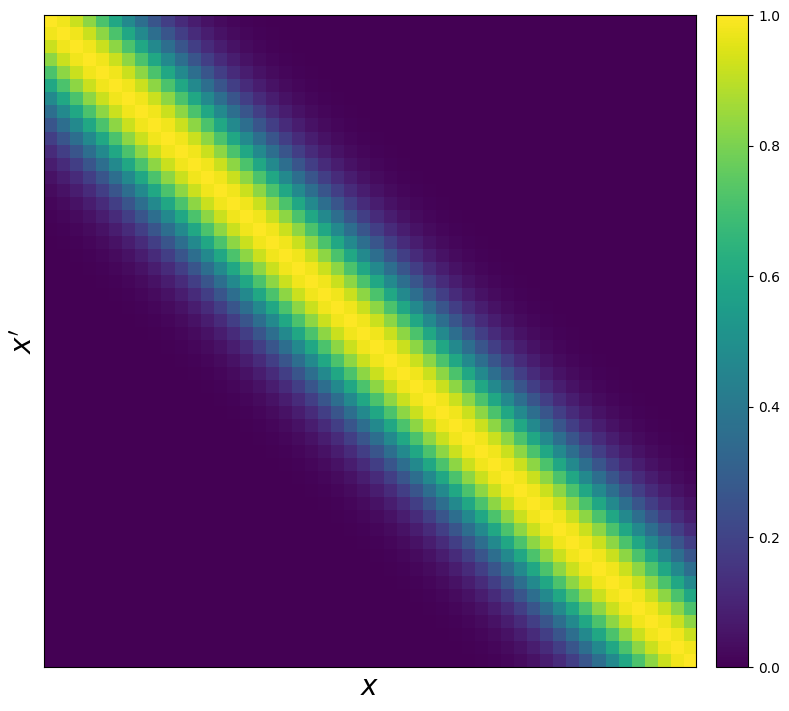

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

im = ax.matshow(K)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.2)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$x^\prime$", fontsize=20)

fig.tight_layout()

## Generacija funkcij iz apriorne porazdelitve

- Želimo generirati vzorce $\vec{x} \sim \mathcal{N}(\vec{m}, K)$ s poljubnim povprečjem in kovariančno matriko.
- Uporabili bomo skalarni Gaussovski generator naključnih števil.
- Najprej izračunamo razcep Choleskega (*matrix square root*) pozitivno definitne simetrične kovariančne matrike: $K=L^\top L$, kjer je $L$ spodnje trikotna matrika.
- Potem generiramo $\vec{u}\sim \mathcal{N}(\vec{0}, \vec{I})$ z generatorjem naključnih števil.
- Izračunamo $\vec{x} = \vec{m} + L\vec{u}$, ki ima željeno porazdelitev.
- V praksi dodamo majhen $\varepsilon \vec{I}$ kovariančni matrike zaradi numerične stabilnosti.

In [6]:
# draw samples from the prior at our test points
L = np.linalg.cholesky(K + 1e-12 * np.eye(n))
u = np.random.normal(size=(n, n_priors))
f_prior = m + np.dot(L, u) # sampling

- Dobimo funkcije (po točkah) $f^i \sim \mathcal{N}(0, K)$ vzorčene po apriorni porazdelitvi.

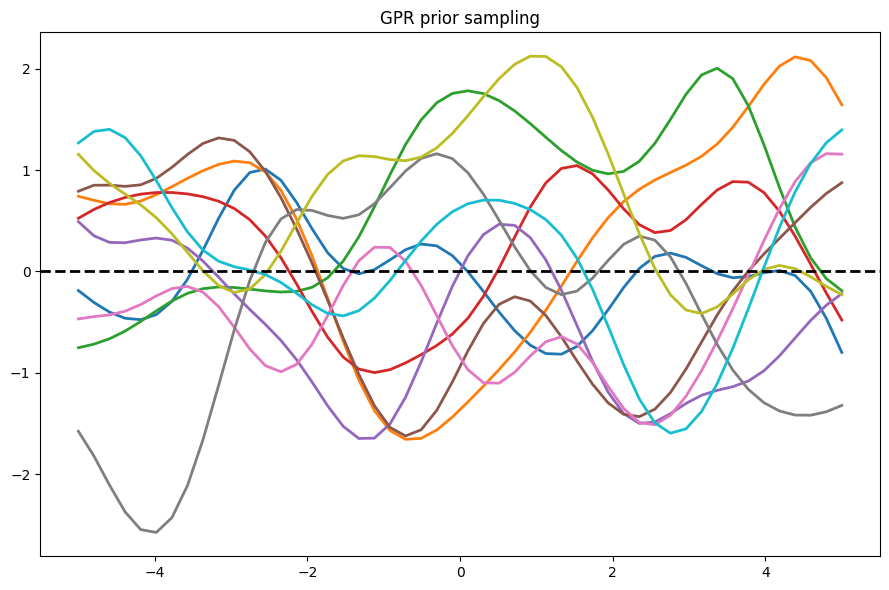

In [7]:
plt.figure(figsize=(9, 6))

plt.plot(X, f_prior, lw=2)
plt.axhline(m, ls="--", lw=2, c="k")

plt.title("GPR prior sampling")
plt.tight_layout()

- Torej, izbrali smo si $N$ vhodnih točk $X_*$, zapisali kovariančno matriko $K$ po komponentah in generirali naključne Gaussovske vektorje s to matriko:
$$
\vec{f}_* \sim \mathcal{N}(\vec{0}, K(X_*, X_*))
$$
ter jih narisali kot funkcije vhodnih podatkov.

## Napovedovanje vrednosti iz meritev brez šuma

- V modelu bi radi upoštevali naše podatke in jih uporabili za *učenje* tega modela.
- Poznamo vrednosti (brez šuma): $\{ \vec{x}_i, f_i \}_{i=1}^N$.
- Skupna verjetnostna porazdelitev $p(\vec{f}, \vec{f}_*|X, X_*)$ učnih in testnih izhodnih vrednosti je:
$$
\begin{bmatrix}
\vec{f} \\ 
\vec{f}_*
\end{bmatrix}
\sim \mathcal{N} \left( \vec{0}, 
\begin{bmatrix}
K(X, X) & K(X, X_*) \\ 
K(X_*, X) & K(X_*, X_*) 
\end{bmatrix}
\right) \>.
$$
- $K(X, X_*)$ je $N\times N_*$ matrika (in podbno za ostale) izračunana v parih učnih in testnih točk.
- Želimo dobiti aposteriorno porazdelitev (*posterior*) funkcij $p(\vec{f}_*|\vec{f}, X, X_*)$.
- Naredimo pogojno verjetnostno porazdelitev glede na podatke:
$$
\vec{f}_* | X_*, X, \vec{f} \sim \mathcal{N}\left( K(X_*, X)K(X, X)^{-1}\vec{f}, K(X_*, X_*) - K(X_*, X)K(X, X)^{-1}K(X, X_*) \right) \>.
$$
- Funkcijske vrednosti $\vec{f}_*$ pripadajoče $X_*$ vzorčimo iz aposteriorne porazdelitve z izračunom povprečja in variance.

## Napovedovanje vrednosti iz meritev s šumom

- Ponavadi nimamo na voljo funkcijskih vrednosti ampak njihove zašumljene realizacije: $y = f(\vec{x}) + \varepsilon$.
- S tem se nam kovariančna matrika spremeni v $\text{cov}(y_i, y_j) = K(\vec{x}_i, \vec{x}_j) + \sigma_n \delta_{ij}$, kjer je $\sigma_n^2$ varianca Gaussovskega šuma, oziroma (to je apriorna predpostavka):
$$
\text{cov}(\vec{y}) = K(X, X) + \sigma_n^2 I \>.
$$
- Sedaj dobimo podobno kot prej:
$$
\begin{bmatrix}
\vec{y} \\ 
\vec{f}_*
\end{bmatrix}
\sim \mathcal{N} \left( \vec{0}, 
\begin{bmatrix}
K(X, X) + \sigma_n^2 I & K(X, X_*) \\ 
K(X_*, X) & K(X_*, X_*) 
\end{bmatrix}
\right) \>.
$$
- Z nekaj računanja dobimo glavni napovedni enačbi Gaussovskih procesov:
$$
\vec{f}_* | X, \vec{y}, X_* \sim \mathcal{N}({\bar{\vec{f}}}, \text{cov}(\vec{f}_*)) \>,
$$
kjer sta
$$
\bar{\vec{f}}_* = \mathbb{E}[\vec{f}_*|X, \vec{y}, X_*] = K(X_*, X)[K(X, X) + \sigma_n^2 I]^{-1}\vec{y}
$$
in
$$
\text{cov}(\vec{f}_*) = K(X_*, X_*) - K(X_*, X)[K(X, X) + \sigma_n^2 I]^{-1} K(X, X_*) \>.
$$

## Algoritem

#### Povprečje

- Računamo povprečje $\bar{\vec{f}}_* = K_*^\top K_y^{-1}\vec{y}$, kjer je $K_y = K(X, X) + \sigma_n^2 \vec{I}$ in $K_*$ vektor izvrednoten v testni točki $X_*$ in učnih točkah $X$:
$$
K_* = K(X_*, X) = \begin{bmatrix} k(X_*, X_1) \\ k(X_*, X_2) \\ \vdots \\ k(X_*, X_n) \end{bmatrix} \>.
$$
- Definiramo $\vec{\alpha} = K_y^{-1}\vec{y}$ in zapišemo $\bar{\vec{f}}_* = K_*^\top \vec{\alpha}$.
- Namesto inverza matrike uporabimo razcep Choleskega:
$$
K_y = LL^T \quad \text{in} \quad \vec{\alpha} = K^{-1}_y \vec{y} = L^{-\top}L^{-1}\vec{y} \>.
$$
- Definiramo $\vec{m} = L^{-1}\vec{y}$ iz česar dobimo sistema enačb $L\vec{m}=\vec{y}$ za $\vec{m}$ in $\vec{\alpha} = L^{-\top}\vec{m}$, oziroma za $\vec{\alpha}$ dobimo $L^\top \vec{\alpha} = \vec{m}$.

#### Varianca

- Računamo $\text{cov}(\vec{f}_*) = K_{**} - K_*^\top K_y^{-1} K_*$, kjer je $K_{**} = K(X_*, X_*)$.
- Razcep Choleskega od prej nam da $K_y^{-1}=L^{-\top}L^{-1} \Rightarrow K_{**} - K_*^\top L^{-\top}L^{-1} K_*$.
- Definiramo $\vec{v}^\top = K_*^\top L^{-\top} \Rightarrow \vec{v}^\top L^\top = K_*^\top \Rightarrow L\vec{v} = K_*$ in s transponiranjem tudi $\vec{v} = L^{-1} K_*$.
- Rešimo sistem enačb $L\vec{v} = K_*$ in dobimo $\vec{v}$.
- S tem smo dobili $\text{cov}(\vec{f}_*) = K_{**} - \vec{v}^\top \vec{v}$.

#### Regresija z Gaussovskimi procesi

Začnemo z: $X$ (učni podatki), $\vec{y}$ (ciljne vrednosti), $K$ (jedro), $\sigma_n^2$ (šum) in $X_*$ (testni podatki).

1. Naredi razcep Choleskega $L = \text{Cholesky}(K_y)$.
2. Reši sistem linearnih enačb $L\vec{m}=\vec{y}$ in dobi $\vec{m}$.
3. Reši sistem linearnih enačb $L^{\top} \vec{\alpha} = \vec{m}$ in dobi $\vec{\alpha}$.
4. Izračunaj povprečje $\bar{\vec{f}}_* = K_*^\top \vec{\alpha}$.
5. Reši sistem linearnih enačb $L\vec{v} = K_*$ in dobi $\vec{v}$.
6. Izračunaj varianco $\text{cov}(\vec{f}_*) = K_{**} - \vec{v}^\top \vec{v}$.

In [8]:
f_true = lambda x: np.sin(x).flatten() # true function we want to approximate

n = 200 # number of test points

X_test = np.linspace(-5, 5, n).reshape(-1, 1) # test column vector
y_true = f_true(X_test) # true function values

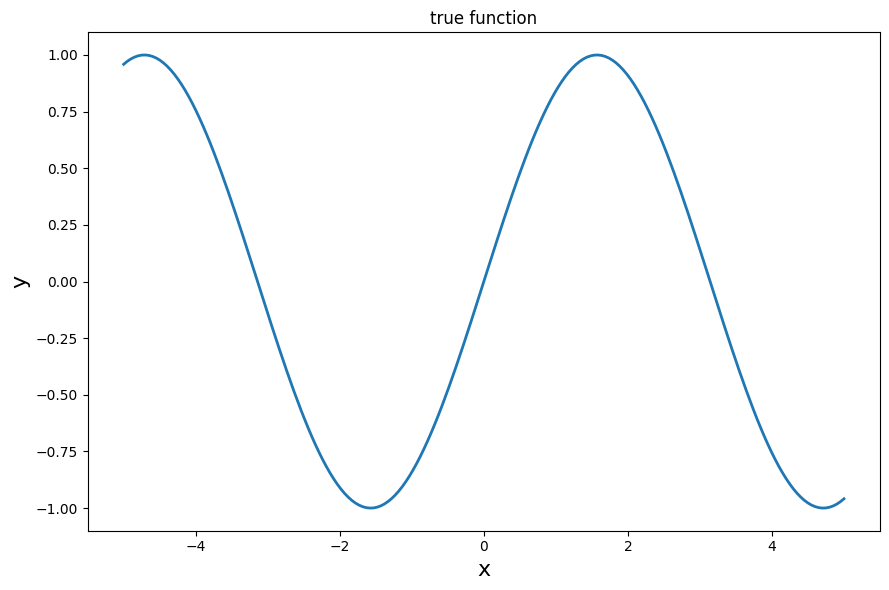

In [9]:
plt.figure(figsize=(9, 6))
plt.plot(X_test.flatten(), y_true, lw=2)
plt.title("true function")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.tight_layout()

In [10]:
N = 10 # number of training points
noise_std = 0.0 # Gaussian std noise to add

X_train = np.random.uniform(-5, 5, size=(N, 1)) # N training points 
y_train = f_true(X_train) + np.random.normal(loc=0.0, scale=noise_std, size=N) # noisy observations
y_train = y_train.reshape(-1, 1)

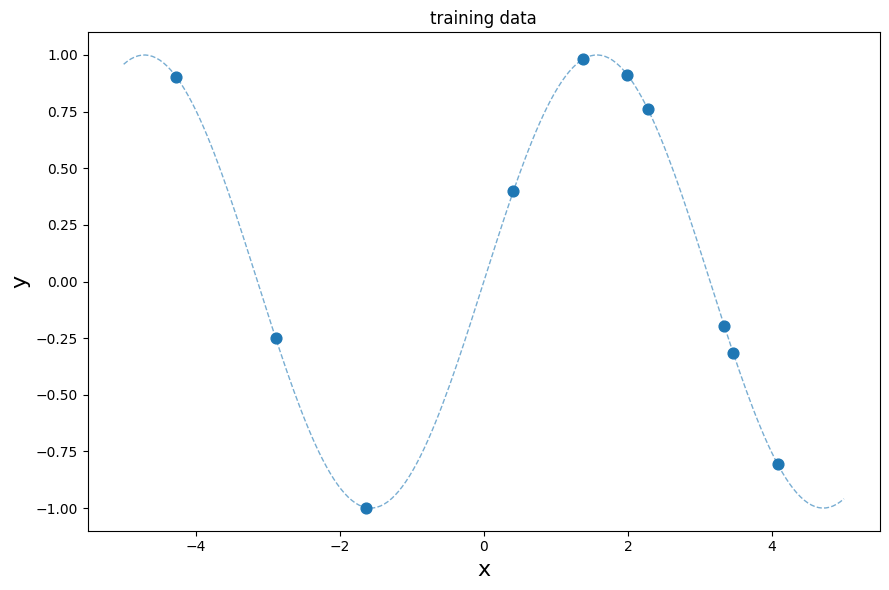

In [11]:
plt.figure(figsize=(9, 6))
plt.scatter(X_train, y_train, s=60)
plt.plot(X_test, y_true, lw=1, ls='--', alpha=0.6)
plt.title("training data")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.tight_layout()

In [12]:
K = se_kernel(X_train, X_train) # squared exponential kernel (no parameter RBF)
L = np.linalg.cholesky(K + noise_std**2 * np.eye(len(K)))

In [13]:
# compute the mean at our test points
m = np.linalg.solve(L, y_train)
alpha = np.linalg.solve(L.T, m)

K_s = se_kernel(X_train, X_test)
mu = np.squeeze(np.dot(K_s.T, alpha))

In [14]:
# compute the variance at our test points
v = np.linalg.solve(L, K_s)

K_ss = se_kernel(X_test, X_test) 

cov = K_ss - np.dot(v.T, v)
var = np.diag(cov)
std = np.sqrt(var)

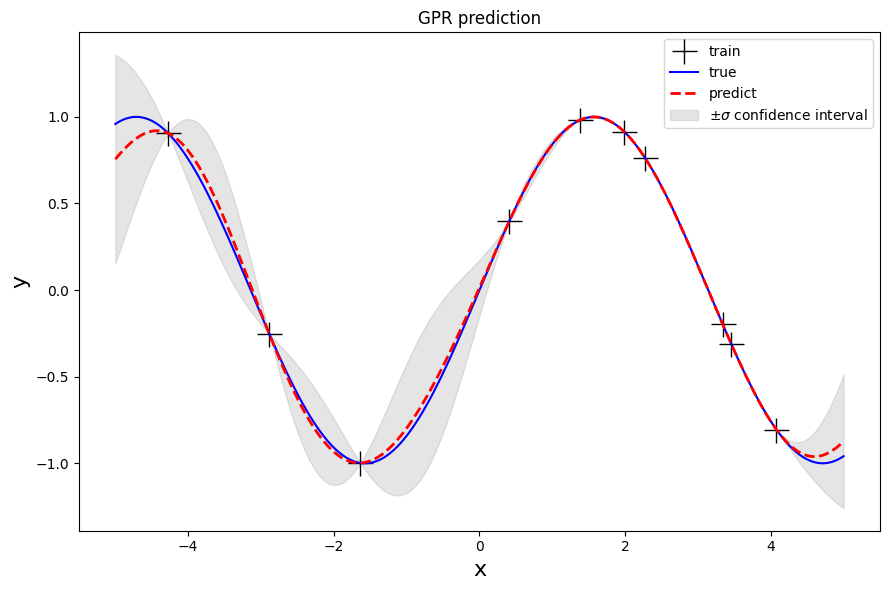

In [15]:
plt.figure(figsize=(9, 6))

plt.plot(X_train, y_train, "k+", ms=18, label="train")
plt.plot(X_test, y_true, "b-", label="true")
plt.plot(X_test, mu, "r--", lw=2, label="predict")
plt.fill_between(
    X_test.flatten(),
    mu + std,
    mu - std,
    color="gray",
    alpha=0.2,
    label="$\pm \sigma$ confidence interval",
)

plt.title("GPR prediction")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(fontsize=10)
plt.tight_layout()

- Vzorčimo lahko tudi iz aposteriorne porazdelitve na enak način kot prej.

In [16]:
# draw samples from the posterior at our test points
n_posterior = 10

L = np.linalg.cholesky(cov + 1e-12 * np.eye(n))
u = np.random.normal(size=(n, n_posterior))
f_posterior = mu.reshape(-1, 1) + np.dot(L, u) # sampling

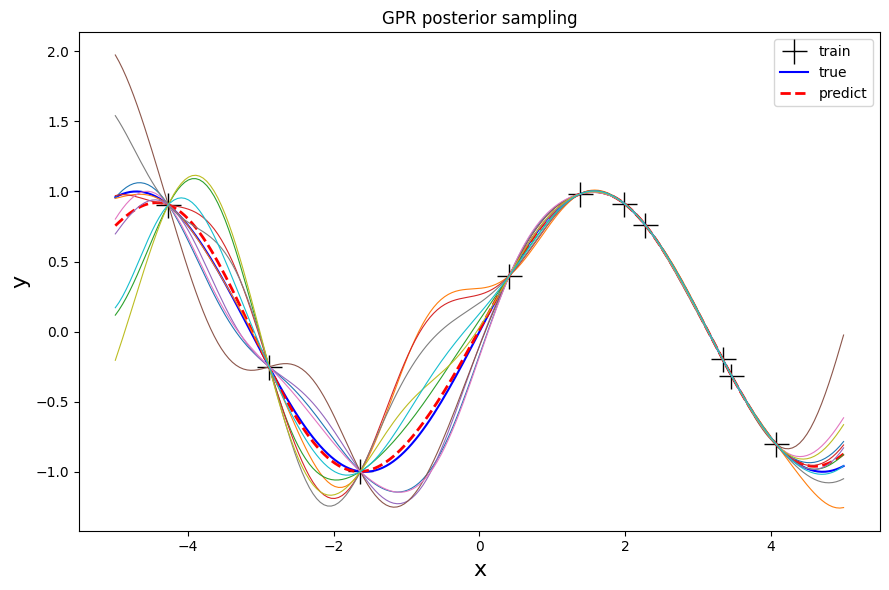

In [17]:
plt.figure(figsize=(9, 6))

plt.plot(X_train, y_train, "k+", ms=18, label="train")
plt.plot(X_test, y_true, "b-", label="true")
plt.plot(X_test, mu, "r--", lw=2, label="predict")
plt.plot(X_test, f_posterior, lw=0.8)

plt.title("GPR posterior sampling")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(fontsize=10)
plt.tight_layout()

- Izračunamo lahko tudi $p(\vec{y}|X)$ (*log marginal likelihood*):
$$
\log p(\vec{y}|X) = -\frac{1}{2} \vec{y}^\top K_y^{-1} \vec{y} - \frac{1}{2}\log |K| - \frac{n}{2} \log 2\pi \>.
$$
- To naredimo v zadnejm koraku algoritma z izračunom:
$$
\log p(\vec{y}|X) = -\frac{1}{2} \vec{y}^\top \vec{\alpha} - \sum_i \log L_{ii} - \frac{n}{2}\log 2\pi \>.
$$
- Pri tem smo izračunali determinanto pozitivno definitne simetrične matrike $K$ z razcepom Choleskega:
$$
\log |K| = \prod_{i} L_{ii}^2 \quad \text{ali} \quad \log |K| = 2 \sum_i \log L_{ii} \>. 
$$
- S tem lahko poiščemo optimalne parametre jedre.

In [18]:
mll = -0.5 * np.dot(y_train.T, alpha) - np.log(np.diag(L)) - 0.5 * n * np.log(2 * np.pi)

# Scikit-learn in Gaussovski procesi

- Pri nalogi bomo uporabili implementacijo GPR iz knjižnice scikit-learn.
- Obstajajo tudi druge:
    - [GPyTorch](https://github.com/jwangjie/gpytorch) (PyTorch),
    - [GPflow](https://github.com/GPflow/GPflow) (Tensorflow),
    - [GPJax](https://github.com/JaxGaussianProcesses/GPJax) (JAX),
    - [GPy](https://github.com/SheffieldML/GPy) (Python)

- Za zgled si bomo ogledali modeliranje točk iz $f(x) = x \sin (x)$.

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

In [20]:
n = 1000 # number of training and testing points

X = np.linspace(0.0, 10.0, n).reshape(-1, 1) # column vector 
y = np.squeeze(X * np.sin(X)) # points from true function

- Podatke razdelimo na učno in testno množico.
- Za učenje bomo uporabili 1% vseh točk.
- Vrednostim bomo dodali še Gaussovski šum z amplitudo $\sigma$.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, shuffle=True)

noise_std = 0.75
y_train_noisy = y_train + np.random.normal(loc=0.0, scale=noise_std, size=y_train.shape)

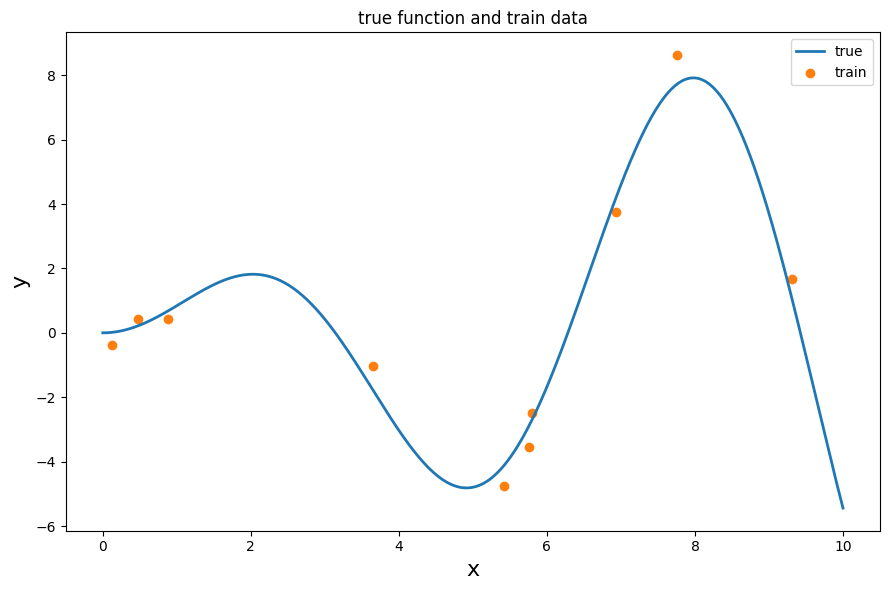

In [22]:
plt.figure(figsize=(9, 6))

plt.plot(X, y, lw=2, label="true")
plt.scatter(X_train, y_train_noisy, c="C1", label="train")

plt.title("true function and train data")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(fontsize=10)

plt.tight_layout()

- Definiramo jedro in GPR model.
- Parameter $\alpha$ interpretiramo kot varianco Gaussovskega šuma vhodnih podatkov (merske napake!).

In [23]:
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=10)

- Na modelu kličemo `fit` funkcijo na učnih podatkih.

In [24]:
gaussian_process.fit(X_train, y_train_noisy)

GaussianProcessRegressor(alpha=0.5625, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

- Model optimizira tudi parametra $\sigma^2$ in $\ell$ jedra RBF.

In [25]:
gaussian_process.kernel_

3.88**2 * RBF(length_scale=1.14)

- Za napovedovanje novih vrednosti na testnih podatkih uporabimo `predict`.

In [26]:
mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)

In [27]:
# flatten for plotting
X_train, X_test = X_train.flatten(), X_test.flatten()
mean_prediction, std_prediction = mean_prediction.flatten(), std_prediction.flatten()

In [28]:
# sort for plotting
idx = np.argsort(X_test)
X_test, mean_prediction, std_prediction = X_test[idx], mean_prediction[idx], std_prediction[idx]

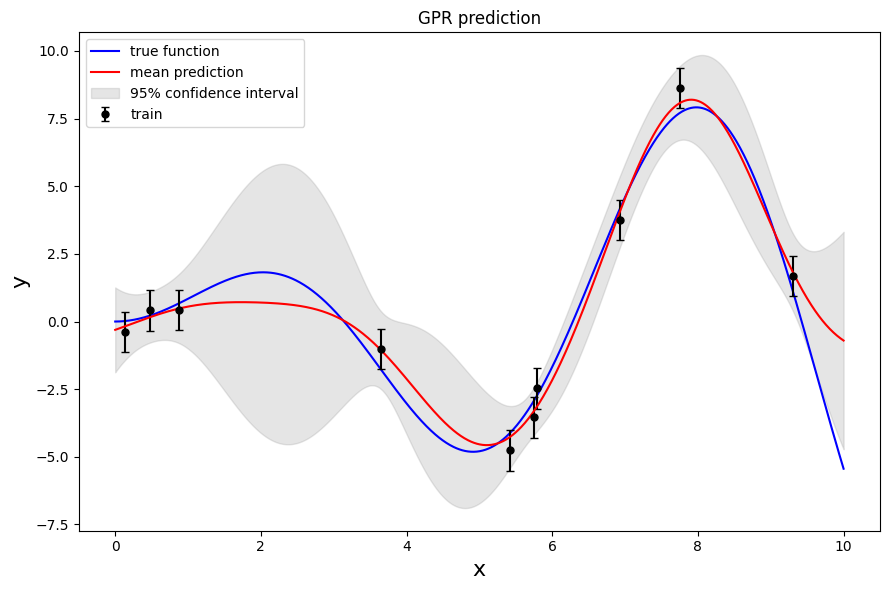

In [29]:
plt.figure(figsize=(9, 6))

plt.plot(X, y, "b-", label="true function")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="k",
    marker=".",
    markersize=10,
    label="train",
    capsize=3,
)
plt.plot(X_test, mean_prediction, label="mean prediction", c="r")
plt.fill_between(
    X_test,
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="gray",
    alpha=0.2,
    label=r"95% confidence interval",
)

plt.title("GPR prediction")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(fontsize=10)

plt.tight_layout()

## Iskanje optimalnih parametrov jedra

- Poiskali bomo najboljša parametra $\sigma^2$ in $\ell$ našega jedra RBF.
- Izračunali bomo $\log p(\vec{y}|X)$ pri različnih vrednostih teh parametrov in poiskali maksimum.
- Bolj učinkovit način bi bil z uporabe kakšne od gradientnih metod.

In [30]:
# make a log grid search space
length_scale = np.logspace(-3, 3, 100)
noise_level = np.logspace(-3, 3, 100)

length_scale_grid, noise_level_grid = np.meshgrid(length_scale, noise_level)

In [31]:
# do grid scan and calculate mll at each point
mll_results = np.empty(len(length_scale) * len(noise_level))

for i, (scale, noise) in enumerate(zip(length_scale_grid.ravel(), noise_level_grid.ravel())):
    mll = gaussian_process.log_marginal_likelihood(theta=np.log([scale, noise]))
    mll_results[i] = mll

mll_results = - np.reshape(mll_results, (len(length_scale), len(noise_level)))

In [32]:
# find the smallest element in mll
idx = np.unravel_index(np.argmin(mll_results), mll_results.shape)
best_length_scale, best_noise_level = length_scale[idx[0]], noise_level[idx[1]]

best_length_scale, best_noise_level

(np.float64(1.072267222010323), np.float64(15.199110829529332))

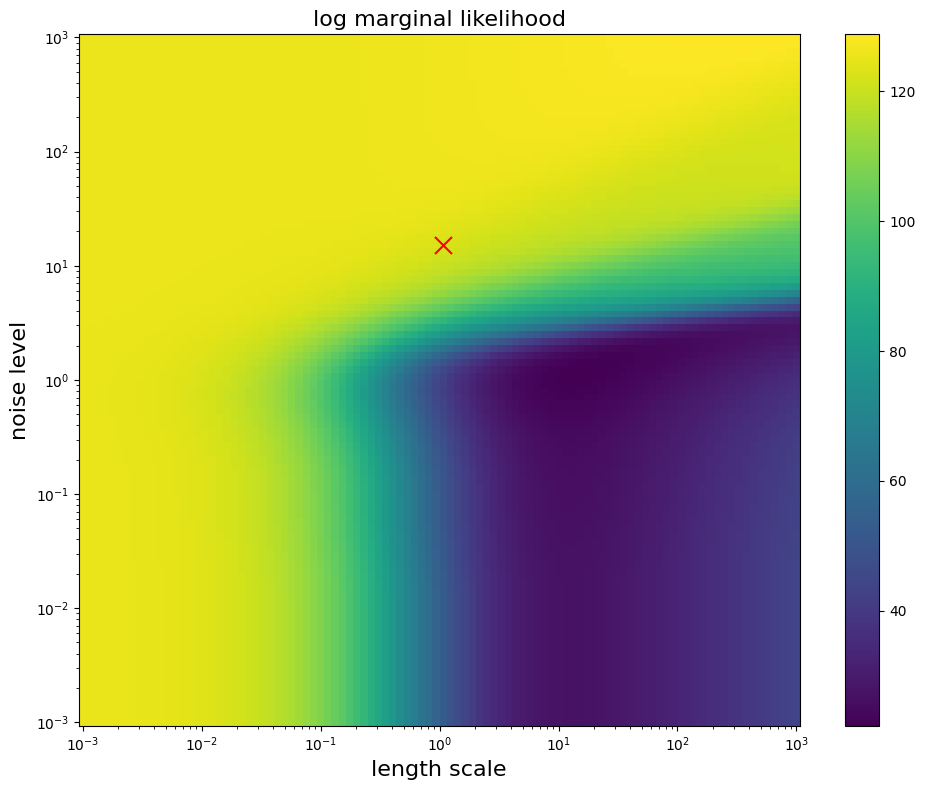

In [33]:
plt.figure(figsize=(10, 8))

plt.pcolormesh(length_scale, noise_level, mll_results)
plt.colorbar()

plt.scatter(best_length_scale, best_noise_level, marker="x", s=150, c="r")

plt.yscale("log")
plt.xscale("log")

plt.xlabel("length scale", fontsize=16)
plt.ylabel("noise level", fontsize=16)
plt.title("log marginal likelihood", fontsize=16)

plt.tight_layout()

# Opombe

## Mercerjeva jedra

- Potrebujemo način kako povedati ali sta dva vhoda vektorja podobna.
- Če vemo, da je $\vec{x}_i$ podoben $\vec{x}_j$, potem morata biti napovedani vrednosti modela $f(\vec{x}_i)$ in $f(\vec{x}_j)$ tudi podobni.
- Da bomo lahko povedali kaj je podbno, definiramo jedrne funkcije (*kernel functions*).
- Zanimamo se za Mercerjeva jedra, tudi poziitvno definitna jedra. To so simetrične funkcije $k: \mathcal{X} \times \mathcal{X}\rightarrow \mathbb{R}^+$ za katere velja:
$$
\sum_{i=1}^N \sum_{j=1}^N k(\vec{x}_i, \vec{x}_j)c_i c_j \geq 0 
$$
za množico $N$ točk $\vec{x_i} \in \mathcal{X}$ in za neko izbiro $c_i \in \mathbb{R}$.

- Pogoj lahko razumemo v matrični obliki. Za $N$ podatkovni točk definiramo $N \times N$ podobnostno matriko $K$.
- $k$ je Mercerjevo jedro, če je matrika $K$ pozitivno definitna za katerikoli množico vhodnih vektorjev $\{ \vec{x}_i\}_{i=1}^N$.

## Mercerjev teorem

- Vsako pozitivno definitvno matriko $K$ lahko razstavimo na $K=U^\top \Lambda U$, kjer je $\Lambda$ diagonalna matrika lastnih rednosti $\lambda_i>0$ in $U$ matrika lastnih vektorjev.
- Matriko $K$ lahko zapišemo po elementih $(i,j)$ kot:
$$
k_{ij} = (\Lambda^{\frac{1}{2}} \vec{u}_i)^\top (\Lambda^{\frac{1}{2}} \vec{u}_j) \>,
$$
kjer sta $\vec{u}_{i,j}$ stolpca $i,j$ matrike $U$.
- Definiramo $\phi(\vec{x}_i)=\Lambda^{\frac{1}{2}} \vec{u}_i$ s čemer lahko sedaj zapišemo elemente matrike kot
$$
k_{ij} = \phi(\vec{x}_i)^\top \phi(\vec{x}_j) = \sum_m \phi_m(\vec{x}_i)\phi_m(\vec{x}_j) \>.
$$
- Funkcija $\phi(\vec{x})$ je nelinearna bazna funkcija, ki preslika vhodne podatke v prostor lastnosti (*feature space*) in doda kompleksnost modelu.
- Vidimo, da lahko izračunamo elemente jedrne matrike $K$ s skalarnim produktom nekih (*feature*) vektorjev, ki so implicitno definirani z lastnimi vektorji te matrike.
- Rezultat je poznan pod imenom Mercerjev teorem.
- Kernel trick: če je naš algoritem definiran preko skalarnih produktov v vhodnem prostoru (*input space*), potem ga lahko pretvorimo v prostor lastnosti (*feature space*) preko zamenjave skalarnih produkto z $k_{ij}$ (ne rabimo poznati oblike $\phi$ ampak samo
matriko $K$).

#### Primer kvadratičnega jedra

- Zamislimo si jedro oblike $k(\vec{x}, \vec{x}^\prime)=(\vec{x}^\top \vec{x}^\prime)^2$.
- V dveh dimenzijah imamo:
$$
k(\vec{x}, \vec{x}^\prime) = (x_1x_2^\prime + x_2x_2^\prime)^2 = x_1^2x_1^{\prime 2} + 2 x_1x_2x_1^\prime x_2^\prime + x_2^2x_2^{\prime 2} \>.
$$
- To lahko zapišemo kot $k(\vec{x}, \vec{x}^\prime)=\vec{\phi}(\vec{x})^\top \vec{\phi}(\vec{x})$, če definiramo
$$
\vec{\phi}(x_1,x_2) = [x_1^2, \sqrt{2}x_1x_2, x_2^2] \in \mathbb{R}^3 \>.
$$
- S tem smo zapisali (*embed*) 2d vhodne podatke v 3d (*feature*) prostor $\vec{\phi}(\vec{x})$.

#### Primer jedra RBF

- V primeru jedra RBF imamo vektorje $\vec{\phi}$ v [neskončno](https://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/svms/RBFKernel.pdf) dimenzionalnem prostoru $\vec{\phi}_{\text{RBF}}(\vec{x}):\mathbb{R}^n\rightarrow \mathbb{R}^\infty$.
- [RBF](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) lahko zapišemo z [razvojem](https://andrewcharlesjones.github.io/journal/rbf.html):

$$
k_{ij} = \sigma^2 \phi(x_i)^\top \phi(x_j) = \sigma^2 \exp \left\{ - \frac{1}{2\ell^2}(x_i^2 + x_j^2)\right\} \sum_{k=0}^\infty \left( \frac{x_ix_j}{\ell^2} \right)^k \frac{1}{k!} \>.
$$

## Numpy broadcasting

In [34]:
x, y = np.array([1, 2, 3]), np.array([1, 2, 3])

result = x.reshape(-1, 1) + y 
result

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [35]:
result = np.empty((len(x), len(y)), dtype=int)
for i in range(len(x)):
    for j in range(len(y)):
        result[i, j] = x[i] + y[j]
result

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

## Razvoj jedra RBF

In [36]:
import math

In [37]:
def finite_RBF(x, y, q, sigma2, length_scale):    
    # constant term
    C = sigma2 * np.exp(-0.5 * (x**2 + y**2) / length_scale**2)

    # interaction between x and y
    qsum = 0.0
    for k in range(q):
        qsum += (x * y / length_scale**2) ** k / math.factorial(k)

    return C * qsum


def get_K(x, q, sigma2=1.0, length_scale=1.0):
    # define matrix of zeros to fill
    K = np.zeros((n, n))
    
    for i in range(len(x)):
        for j in range(i + 1):
            # get k_ij element
            k = finite_RBF(x[i], x[j], q, sigma2, length_scale)
            # K is symmetric 
            K[i, j] = k
            K[j, i] = k

    return K

In [38]:
n = 100 # number of points
q = 32 # number of terms in Taylor expension of exp
sigma2, length_scale = 1.0, 1.0 # RBF parameters
x = np.linspace(-3, 3, n) # input vector

In [39]:
K = get_K(x, q, sigma2, length_scale)

## Marginalne in pogojne porazdelitve večdimenzionalne Gaussovske porazdelitve

<div>
    <img src="images/mvn_theorem.png" width="500"/>
</div>

- Za $\mu_{2|1}$ in $\Sigma_{2|1}$ naredimo zamenjavo indeksov $1 \leftrightarrow 2$.
- Iz tega sledijo enačbe za GP.
- Glej: https://github.com/soulmachine/machine-learning-cheat-sheet.